k-匿名性

验证K-匿名性

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
raw_data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
    'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
    'age': [42, 52, 36, 24, 73], 
    'preTestScore': [4, 24, 31, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70]}
#df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df = pd.DataFrame(raw_data, columns = ['age', 'preTestScore', 'postTestScore'])

In [3]:
df

,age,preTestScore,postTestScore
0,42,4,25
1,52,24,94
2,36,31,57
3,24,2,62
4,73,3,70


In [4]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if rows.shape[0] < k:
            return False
    return True

In [5]:
isKAnonymized(df, 1)

True

In [6]:
isKAnonymized(df, 2)

False

泛化数据以满足K-匿名性

In [7]:
def generalize(df, depths):
    return df.apply(lambda x: x.apply(lambda y: int(int(y/(10**depths[x.name]))*(10**depths[x.name]))))

In [8]:
depths = {
    'age': 1,
    'preTestScore': 1,
    'postTestScore': 1
}
df2 = generalize(df, depths)

In [9]:
df2

,age,preTestScore,postTestScore
0,40,0,20
1,50,20,90
2,30,30,50
3,20,0,60
4,70,0,70


In [10]:
isKAnonymized(df2, 2)

False

In [11]:
depths = {
    'age': 2,
    'preTestScore': 2,
    'postTestScore': 2
}

In [12]:
generalize(df, depths)

,age,preTestScore,postTestScore
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


引入更多的数据可以减小泛化的影响吗？

In [13]:
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df = adult_data[['Age', 'Education-Num']]
df.columns = ['age', 'edu']
isKAnonymized(df.head(100), 1)

True

In [15]:
isKAnonymized(df.head(100), 2)

False

In [16]:
# outliers are a real problem!
depths = {
    'age': 1,
    'edu': 1
}
df2 = generalize(df.head(1000), depths)
isKAnonymized(df2, 2)

False

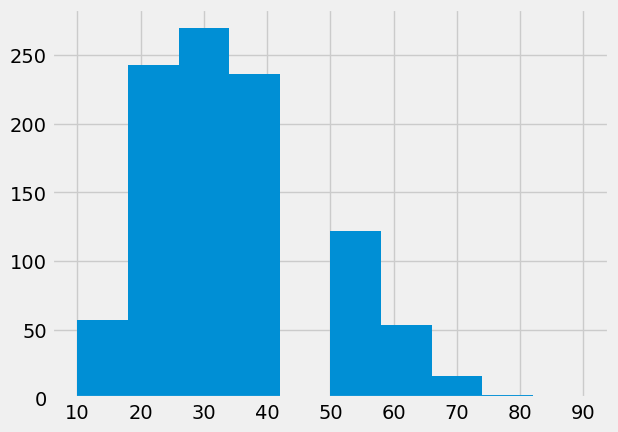

In [17]:
df2['age'].hist();

In [18]:
# 裁剪异常值
depths = {
    'age': 1,
    'edu': 1
}
dfp = df.clip(upper=np.array([60, 10000000000000]), axis='columns')
df2 = generalize(dfp.head(500), depths)
isKAnonymized(df2, 7)

True